### Dimension reduction with PCA

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from pandera.typing import Series, DataFrame

import ast

In [2]:
X1 = pd.read_csv("datasets/X1.csv")

In [3]:
X1.head()

,Unnamed: 0,title,img_url,description,ratings,n_votes,is_adult,production_year,runtime,genres,release_year,studio,img_embeddings,text_embeddings
0,2502,Letters to Juliet,https://m.media-amazon.com/images/M/MV5BMjg0OT...,Letters to Juliet: Directed by Gary Winick. Wi...,6.5,92937.0,0,2010,105,"Adventure,Comedy,Drama",2010.0,Sum.,"[0.25030804, 2.4058464, 1.0431569, 0.030648155...","[-0.6795498, 0.35658365, 0.9994932, -0.9793934..."
1,6238,Veil of Tears,https://m.media-amazon.com/images/M/MV5BZjMxOD...,Veil of Tears: Directed by William Gereghty. W...,7.9,11.0,0,1996,\N,"Action,Crime,Drama",2014.0,WF,"[0.51250213, 2.8152602, 0.46308166, 0.29031387...","[-0.6202415, 0.31657028, 0.9992422, -0.9703722..."
2,1800,International Velvet,https://m.media-amazon.com/images/M/MV5BOGVkYj...,International Velvet: Directed by Bryan Forbes...,5.9,1345.0,0,1978,127,"Drama,Family,Sport",1978.0,MGM,"[0.18073043, 0.24735461, 0.63652813, 0.2496522...","[-0.709996, 0.4233521, 0.99980927, -0.98892415..."
3,2675,8 Seconds,https://m.media-amazon.com/images/M/MV5BYjY4Nz...,8 Seconds: Directed by John G. Avildsen. With ...,6.6,4851.0,0,1994,105,"Biography,Drama,Sport",1994.0,NL,"[0.025015268, 0.9105338, 0.3878257, 0.3421247,...","[-0.7416838, 0.38435012, 0.9998453, -0.9874693..."
4,3674,Penitentiary II,https://m.media-amazon.com/images/M/MV5BNjQyZW...,Penitentiary II: Directed by Jamaa Fanaka. Wit...,4.1,549.0,0,1982,108,"Crime,Drama,Sport",1982.0,MGM,"[0.19079691, 1.9068279, 0.29114372, 0.19527505...","[-0.65501904, 0.3845747, 0.9996712, -0.9766391..."


In [4]:
def extract_embeddings_features(embeddings: Series):
	"""
	Args:
		embeddings (np.ndarray): array of string representation of feature vectors.
	Return:
		(np.ndarray): feature matrix of dimension (n_observations, n_features)
	"""
	n = embeddings.shape[0]
	embeddings_matrix = []

	for i in range(n):
		# embeddings are encoded as string representation of vector
		# convert these into list
		feature_vector = ast.literal_eval(embeddings.iloc[i])
		print(feature_vector)
		embeddings_matrix.append(feature_vector)

	print(embeddings_matrix)
	return embeddings_matrix

### Reducing img embeddings

In [6]:
img_embeddings_serie = X1["img_embeddings"]
img_embeddings_serie.shape

(3540,)

In [7]:
img_embeddings_serie.head()

0    [0.25030804, 2.4058464, 1.0431569, 0.030648155...
1    [0.51250213, 2.8152602, 0.46308166, 0.29031387...
2    [0.18073043, 0.24735461, 0.63652813, 0.2496522...
3    [0.025015268, 0.9105338, 0.3878257, 0.3421247,...
4    [0.19079691, 1.9068279, 0.29114372, 0.19527505...
Name: img_embeddings, dtype: object

Create columns for pandas dataframe

In [ ]:
img_columns = []
img_embeddings = []

for i in range(img_embeddings_serie.shape[0]):
    # embeddings are encoded as string representation of vector
    img_embeddings.append(ast.literal_eval(img_embeddings_serie.iloc[i]))

img_first_embedding = img_embeddings[0]
print(len(img_first_embedding))

img_columns.extend(["img_embeddings" + str(i + 1) for i in range(len(img_first_embedding))])
print(len(img_columns))

img_columns[:5]

2048
2048


['img_embeddings1',
 'img_embeddings2',
 'img_embeddings3',
 'img_embeddings4',
 'img_embeddings5']

In [ ]:
img_embeddings_df = pd.Series(img_embeddings).apply(pd.Series)
img_embeddings_df

,0,1,2,3,4,5,6,7,8,9,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,0.250308,2.405846,1.043157,0.030648,0.349497,0.320495,0.901077,0.674996,0.310549,0.533353,...,0.115729,0.458049,0.921232,0.639395,0.699187,0.060539,0.158502,0.459635,0.723325,0.850279
1,0.512502,2.815260,0.463082,0.290314,1.080451,0.333979,0.909705,0.817344,0.340002,0.507425,...,0.721747,0.629574,0.990730,0.392402,0.080273,0.312965,0.961384,0.066073,0.353533,0.139141
2,0.180730,0.247355,0.636528,0.249652,0.100523,0.055299,0.850117,0.015236,0.232086,0.558831,...,0.256043,0.336772,0.101175,0.242433,0.482843,0.187792,0.466467,0.023835,0.036051,0.127028
3,0.025015,0.910534,0.387826,0.342125,0.449293,0.517494,0.213289,0.463569,0.863764,0.544507,...,0.676794,0.628284,0.257829,0.205191,0.816652,0.058561,0.025909,0.131811,0.048419,1.148938
4,0.190797,1.906828,0.291144,0.195275,0.525999,0.502706,0.359901,0.074025,0.379786,0.182895,...,1.111816,0.472659,0.235317,0.160041,0.160780,0.227784,0.689268,0.249997,0.283735,0.221155
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3535,0.199919,1.371854,1.153181,0.052152,0.536693,0.082999,0.327779,0.067693,0.368952,0.440536,...,0.077020,0.867404,0.954470,0.489125,0.119774,0.322240,0.587947,0.123356,0.270082,0.559902
3536,0.386605,0.819479,1.952105,0.238317,0.502970,0.193758,1.336698,0.286949,0.489620,0.567320,...,0.367226,0.042187,0.867098,0.092265,1.224381,0.104211,0.686160,0.134758,0.065954,0.561103
3537,0.150146,2.013944,1.084489,0.172703,0.609013,0.387161,0.484712,0.408787,0.177421,0.471901,...,0.090079,0.315628,0.561093,0.533992,1.091854,0.056666,0.711937,0.092189,0.197398,0.372941
3538,0.253917,3.899491,0.233273,0.173226,1.474815,0.347801,0.720919,0.262827,0.411901,0.196077,...,1.122257,0.058686,0.037603,0.328881,0.364973,0.168523,0.523019,0.131600,1.396653,0.734175


In [ ]:
img_embeddings_df = pd.DataFrame(img_embeddings_df, index=X1.index)
img_embeddings_df.columns = img_columns

img_embeddings_df.head()

,img_embeddings1,img_embeddings2,img_embeddings3,img_embeddings4,img_embeddings5,img_embeddings6,img_embeddings7,img_embeddings8,img_embeddings9,img_embeddings10,...,img_embeddings2039,img_embeddings2040,img_embeddings2041,img_embeddings2042,img_embeddings2043,img_embeddings2044,img_embeddings2045,img_embeddings2046,img_embeddings2047,img_embeddings2048
0,0.250308,2.405846,1.043157,0.030648,0.349497,0.320495,0.901077,0.674996,0.310549,0.533353,...,0.115729,0.458049,0.921232,0.639395,0.699187,0.060539,0.158502,0.459635,0.723325,0.850279
1,0.512502,2.815260,0.463082,0.290314,1.080451,0.333979,0.909705,0.817344,0.340002,0.507425,...,0.721747,0.629574,0.990730,0.392402,0.080273,0.312965,0.961384,0.066073,0.353533,0.139141
2,0.180730,0.247355,0.636528,0.249652,0.100523,0.055299,0.850117,0.015236,0.232086,0.558831,...,0.256043,0.336772,0.101175,0.242433,0.482843,0.187792,0.466467,0.023835,0.036051,0.127028
3,0.025015,0.910534,0.387826,0.342125,0.449293,0.517494,0.213289,0.463569,0.863764,0.544507,...,0.676794,0.628284,0.257829,0.205191,0.816652,0.058561,0.025909,0.131811,0.048419,1.148938
4,0.190797,1.906828,0.291144,0.195275,0.525999,0.502706,0.359901,0.074025,0.379786,0.182895,...,1.111816,0.472659,0.235317,0.160041,0.160780,0.227784,0.689268,0.249997,0.283735,0.221155


In [ ]:
img_emdeddings_df.head()

,img_embeddings1,img_embeddings2,img_embeddings3,img_embeddings4,img_embeddings5,img_embeddings6,img_embeddings7,img_embeddings8,img_embeddings9,img_embeddings10,...,img_embeddings2039,img_embeddings2040,img_embeddings2041,img_embeddings2042,img_embeddings2043,img_embeddings2044,img_embeddings2045,img_embeddings2046,img_embeddings2047,img_embeddings2048
0,0.250308,2.405846,1.043157,0.030648,0.349497,0.320495,0.901077,0.674996,0.310549,0.533353,...,0.115729,0.458049,0.921232,0.639395,0.699187,0.060539,0.158502,0.459635,0.723325,0.850279
1,0.512502,2.815260,0.463082,0.290314,1.080451,0.333979,0.909705,0.817344,0.340002,0.507425,...,0.721747,0.629574,0.990730,0.392402,0.080273,0.312965,0.961384,0.066073,0.353533,0.139141
2,0.180730,0.247355,0.636528,0.249652,0.100523,0.055299,0.850117,0.015236,0.232086,0.558831,...,0.256043,0.336772,0.101175,0.242433,0.482843,0.187792,0.466467,0.023835,0.036051,0.127028
3,0.025015,0.910534,0.387826,0.342125,0.449293,0.517494,0.213289,0.463569,0.863764,0.544507,...,0.676794,0.628284,0.257829,0.205191,0.816652,0.058561,0.025909,0.131811,0.048419,1.148938
4,0.190797,1.906828,0.291144,0.195275,0.525999,0.502706,0.359901,0.074025,0.379786,0.182895,...,1.111816,0.472659,0.235317,0.160041,0.160780,0.227784,0.689268,0.249997,0.283735,0.221155


Reducing dimension with PCA

In [ ]:
img_pca = PCA(n_components=2048)

img_embeddings_reduced = img_pca.fit_transform(img_embeddings_df)
img_embeddings_reduced.shape

(3540, 2048)

In [ ]:
img_percentage_variance_explained = img_pca.explained_variance_ / np.sum(img_pca.explained_variance_)
img_cum_variance_explained = np.cumsum(img_percentage_variance_explained)

print(img_percentage_variance_explained)
print(img_cum_variance_explained)

[5.59053429e-02 4.89018811e-02 4.17711701e-02 ... 5.25960867e-07
 5.06253782e-07 4.34721753e-07]
[0.05590534 0.10480722 0.14657839 ... 0.99999906 0.99999957 1.        ]


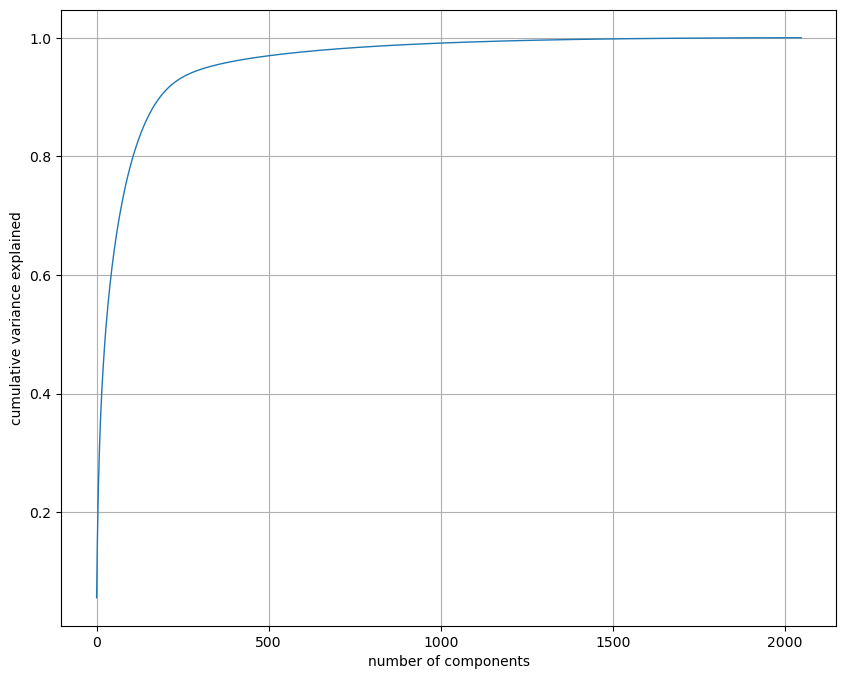

In [ ]:
plt.figure(1, figsize=(10, 8))

plt.clf()
plt.plot(img_cum_variance_explained, linewidth=1)

plt.xlabel("number of components")
plt.ylabel("cumulative variance explained")
plt.axis("tight")
plt.grid()

plt.show()

In [ ]:
img_pca = PCA(n_components=0.95)

img_embeddings_reduced = img_pca.fit_transform(img_embeddings_df)
img_embeddings_reduced.shape

(3540, 322)

In [ ]:
pd.DataFrame(img_emdeddings_reduced, index=X1.index)

,0,1,2,3,4,5,6,7,8,9,...,312,313,314,315,316,317,318,319,320,321
0,-3.256423,-6.489782,-3.349826,-1.176243,5.894108,-0.582136,-1.162294,2.127665,-5.287233,0.113006,...,0.252786,0.059506,-0.030677,0.058772,0.047620,-0.105465,-0.033416,0.127148,0.184893,0.004256
1,-5.427694,-1.379280,-3.140819,-1.040827,-7.670341,4.402956,1.477612,-4.143031,3.968786,-0.363430,...,0.401426,0.132388,0.109634,0.348838,0.153769,0.015273,0.043278,0.009870,0.474259,0.273964
2,2.052498,4.428170,-0.752582,-4.224726,0.135599,-6.221734,-0.616346,-2.478796,-0.905413,1.932004,...,-0.160894,0.009350,0.118648,-0.147473,0.244418,-0.184144,0.073913,0.075028,0.023551,0.224811
3,-0.471237,-1.694621,-0.049637,1.634928,4.501642,-1.862501,1.264639,3.068550,0.013512,0.815582,...,-0.267571,-0.174049,-0.465205,-0.232781,-0.184758,-0.007255,-0.193669,0.186097,-0.144560,0.185861
4,-6.992411,-0.808759,2.917043,-3.761220,-0.366074,2.251421,0.508704,-2.130753,0.289921,0.246137,...,0.194155,0.013157,-0.294796,-0.202175,0.008202,0.015281,0.194099,0.139085,-0.025912,-0.023513
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3535,0.565792,-5.494323,-1.217602,-3.565573,2.089628,-0.828732,-2.309746,-0.633528,-4.298987,0.576268,...,0.232802,-0.101894,0.160827,0.331274,0.153152,-0.219204,-0.153026,-0.041506,0.268632,-0.306852
3536,7.760153,-3.936266,-2.258961,-1.047247,-2.443828,2.688721,-0.176099,-3.264218,-2.698774,1.791414,...,0.203188,0.166053,-0.102456,-0.004076,-0.161628,-0.219682,0.277740,-0.245586,0.184153,0.013128
3537,2.313977,1.986054,-4.530124,-4.082075,-0.434968,-1.496928,-0.708325,1.388949,-0.323287,2.507417,...,0.159252,-0.240919,-0.071077,0.240142,0.499467,0.035195,-0.153670,-0.114386,-0.077748,-0.101864
3538,-4.816870,0.872284,2.289393,-4.887198,1.093023,3.987757,-2.350132,7.223423,3.558525,-4.663561,...,0.132737,-0.000722,-0.244851,-0.304022,0.165770,0.336307,0.149429,-0.551125,-0.283723,0.154379


We can reduce the dimension of the "img embeddings" from 2048 to 322 features retaining 95% of the variance

In [ ]:
img_embeddings_reduced_df = pd.DataFrame(img_embeddings_reduced, index = X1.index)
img_embeddings_reduced_df = img_embeddings_reduced_df.add_prefix("img_embeddings")

img_embeddings_reduced_df.head()

,img_embeddings0,img_embeddings1,img_embeddings2,img_embeddings3,img_embeddings4,img_embeddings5,img_embeddings6,img_embeddings7,img_embeddings8,img_embeddings9,...,img_embeddings312,img_embeddings313,img_embeddings314,img_embeddings315,img_embeddings316,img_embeddings317,img_embeddings318,img_embeddings319,img_embeddings320,img_embeddings321
0,-3.256423,-6.489782,-3.349826,-1.176243,5.894108,-0.582136,-1.162294,2.127665,-5.287233,0.113006,...,0.252786,0.059506,-0.030677,0.058772,0.047620,-0.105465,-0.033416,0.127148,0.184893,0.004256
1,-5.427694,-1.379280,-3.140819,-1.040827,-7.670341,4.402956,1.477612,-4.143031,3.968786,-0.363430,...,0.401426,0.132388,0.109634,0.348838,0.153769,0.015273,0.043278,0.009870,0.474259,0.273964
2,2.052498,4.428170,-0.752582,-4.224726,0.135599,-6.221734,-0.616346,-2.478796,-0.905413,1.932004,...,-0.160894,0.009350,0.118648,-0.147473,0.244418,-0.184144,0.073913,0.075028,0.023551,0.224811
3,-0.471237,-1.694621,-0.049637,1.634928,4.501642,-1.862501,1.264639,3.068550,0.013512,0.815582,...,-0.267571,-0.174049,-0.465205,-0.232781,-0.184758,-0.007255,-0.193669,0.186097,-0.144560,0.185861
4,-6.992411,-0.808759,2.917043,-3.761220,-0.366074,2.251421,0.508704,-2.130753,0.289921,0.246137,...,0.194155,0.013157,-0.294796,-0.202175,0.008202,0.015281,0.194099,0.139085,-0.025912,-0.023513


### Reducing text embeddings

In [ ]:
text_embeddings_serie = X1["text_embeddings"]
text_embeddings_serie.shape

(3540,)

In [ ]:
text_embeddings_serie.head()

0    [-0.6795498, 0.35658365, 0.9994932, -0.9793934...
1    [-0.6202415, 0.31657028, 0.9992422, -0.9703722...
2    [-0.709996, 0.4233521, 0.99980927, -0.98892415...
3    [-0.7416838, 0.38435012, 0.9998453, -0.9874693...
4    [-0.65501904, 0.3845747, 0.9996712, -0.9766391...
Name: text_embeddings, dtype: object

In [ ]:
text_columns = []
text_embeddings = []

for i in range(text_emdeddings_serie.shape[0]):
    # embeddings are encoded as string representation of vector
    text_embeddings.append(ast.literal_eval(text_embeddings_serie.iloc[i]))

text_first_embedding = text_embeddings[0]
print(len(text_first_embedding))

text_columns.extend(["text_embeddings" + str(i + 1) for i in range(len(text_first_embedding))])
print(len(text_columns))

text_columns[:5]

768
768


['text_embeddings1',
 'text_embeddings2',
 'text_embeddings3',
 'text_embeddings4',
 'text_embeddings5']

In [ ]:
text_embeddings_df = pd.Series(text_embeddings).apply(pd.Series)
text_embeddings_df

In [ ]:
text_embeddings_df = pd.DataFrame(text_embeddings_df, index=X1.index)
text_embeddings_df.columns = text_columns

text_embeddings_df.head()

In [ ]:
text_embeddings_df.head()

Reducing dimension with PCA

In [ ]:
text_pca = PCA(n_components=768)

text_embeddings_reduced = text_pca.fit_transform(text_embeddings_df)
text_embeddings_reduced.shape

In [ ]:
text_percentage_variance_explained = text_pca.explained_variance_ / np.sum(text_pca.explained_variance_)
text_cum_variance_explained = np.cumsum(text_percentage_variance_explained)

print(text_percentage_variance_explained)
print(text_cum_variance_explained)

In [ ]:
plt.figure(1, figsize=(10, 8))

plt.clf()
plt.plot(text_cum_variance_explained, linewidth=1)

plt.xlabel("number of components")
plt.ylabel("cumulative variance explained")
plt.axis("tight")
plt.grid()

plt.show()

In [ ]:
text_pca = PCA(n_components=0.95)

text_embeddings_reduced = text_pca.fit_transform(text_embeddings_df)
text_embeddings_reduced.shape

We can reduce the dimension of the "text embeddings" from 768 to 17 features retaining 95% of the variance

In [ ]:
text_embeddings_reduced_df = pd.DataFrame(text_embeddings_reduced, index = X1.index)
text_embeddings_reduced_df = text_embeddings_reduced_df.add_prefix("text_embeddings")

text_embeddings_reduced_df.head()

In [ ]:
text_embeddings_reduced_df.to_csv("datasets/X1_text_embeddings.csv")